In [1]:
import cliqueGenerator as clqgen
import random 

print(clqgen.generate(10, 3))

{0: [1, 2], 1: [0, 2], 2: [0, 1], 3: [4, 5], 4: [5], 5: [], 6: [8], 7: [8], 8: [], 9: []}


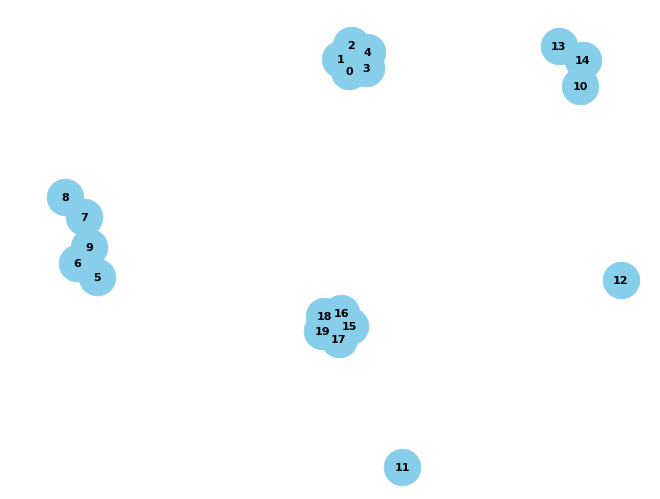

In [2]:
node_number = 20
maximum_clique = 5
graph = clqgen.generate(node_number, maximum_clique)
clqgen.draw_graph(graph)

In [3]:
old_population = [[1, 0, 1, 0], [1, 0, 0, 0]]

# Generación de poblaciones in place. 
def generate_population(old_population: list, population_size=0, vertex_num=0):
    # If it is empty, we generate for clique 3.
    if old_population == []:
        for _ in range(population_size):
            old_population.append([0]*vertex_num)
        for _ in range(2):
            add_random_vertex_to_all_population(old_population)
    else:
            add_random_vertex_to_all_population(old_population)

# Inplace.
def add_random_vertex_to_all_population(old_population):
    for individual in old_population:
        no_vertices_positions = []
        for vertex_index, vertex in enumerate(individual):
            if vertex == 0: 
                no_vertices_positions.append(vertex_index)
        new_vertex = random.randint(0, len(no_vertices_positions)-1)
        individual[no_vertices_positions[new_vertex]] = 1

generate_population(old_population)
print(old_population)
empty_population = []
generate_population(empty_population, 3, 4)
print(empty_population)
generate_population(empty_population)
print(empty_population)

[[1, 0, 1, 1], [1, 0, 0, 1]]
[[1, 0, 0, 1], [1, 0, 0, 1], [0, 0, 1, 1]]
[[1, 0, 1, 1], [1, 0, 1, 1], [0, 1, 1, 1]]


In [4]:
# Doesn't matters if it's in place.
def fitness(individual, graph, current_clique_number) -> float:
    total = 0
    for index, has_vertex in enumerate(individual):
        # Tengo que contar como n(n-1) arcos, porque cuento cada uno dos veces.
        if has_vertex == 1:
            total += len(graph[index])
    return total/(current_clique_number*(current_clique_number-1))

In [5]:
# Not in place.
def crossover(individual1, individual2, k):
    # Contrary of the other.
    new_individual1, new_individual2 = non_k_crossover(individual1, individual2)
    while sum(new_individual1) != k or sum(new_individual2) != k:
        new_individual1, new_individual2 = non_k_crossover(individual1, individual2)
    return (new_individual1, new_individual2)

def non_k_crossover(individual1, individual2):
    size = len(individual1)
    random_permutation = [1 if random.random()>=0.5 else 0 for _ in range(size)]
    new_individual1 = [individual1[i] if random_permutation[i] else individual2[i] 
                    for i in range(size)]
    new_individual2 = [individual2[i] if random_permutation[i] else individual1[i] 
                    for i in range(size)]
    return (new_individual1, new_individual2)

In [6]:
# In place
def mutation(individual):
    size = len(individual)
    mutation_position1 = random.randint(0, size-1)
    mutation_position2 = random.randint(0, size-1)
    auxiliar = individual[mutation_position1]
    individual[mutation_position1] = individual[mutation_position2]
    individual[mutation_position2] = auxiliar

In [7]:
def has_k_clique(graph, k, population_size = 5, mutation_probability=0.05, generations=1000000):
    generation = 0
    population = []
    generate_population(population, population_size, len(graph))
    for _ in range(k-2):
        generate_population(population)
    while generation <= generations:
        population_fitness = [round(fitness(individual, graph, k), 2) 
                              for individual in population]
        if 1 <= sorted(population_fitness)[0]:
            print("Has clique of size", k,
                  "Population", population,
                  "Generation", generation)
            return True
        else: 
            population = [individual for _, individual in sorted(zip(population_fitness, population))]
            for i in range(0, len(population)-1, 2):
                new1, new2 = crossover(population[i], population[i+1], k)
                population[i] = new1
                population[i+1] = new2
            if random.random() < mutation_probability:
                individual_to_mutate = random.randint(0, len(population)-1)
                mutation(population[individual_to_mutate])
        generation += 1
    print("DOES NOT HAVE clique of size", k,
                  "Population", population,
                  "Generation", generation) 
    return False

Graph  {0: [1, 2, 3, 4, 5], 1: [0, 2, 3, 4, 5], 2: [0, 1, 3, 4, 5], 3: [0, 1, 2, 4, 5], 4: [0, 1, 2, 3, 5], 5: [0, 1, 2, 3, 4], 6: [7], 7: [9, 11], 8: [10], 9: [], 10: [], 11: [], 12: [13, 15, 17], 13: [17], 14: [15, 17], 15: [16], 16: [17], 17: [], 18: [19], 19: []}


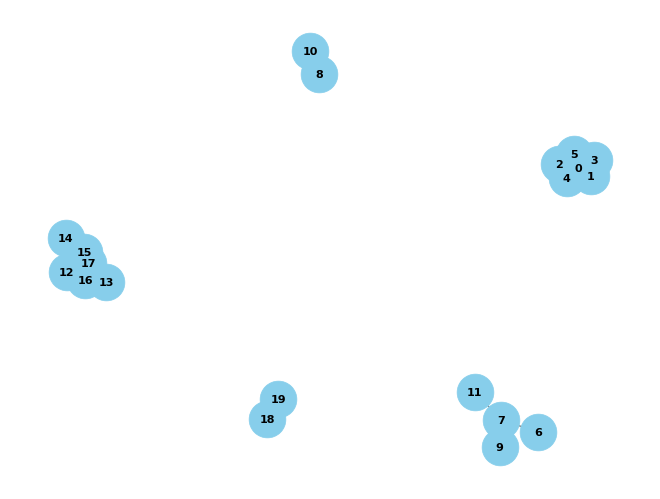

In [8]:
graph = clqgen.generate(20, 6)
print("Graph ", graph)
clqgen.draw_graph(graph)

In [9]:
def maximum_clique_size(graph, population_size = 5, mutation_probability=0.05, generations=1000000):
    last = True
    # Penúltimo.
    second_last = True
    for i in range(3,len(graph)):
        second_last = last
        last = has_k_clique(graph, i, population_size, mutation_probability, generations)
        # If there was no clique found in the last two...
        if not last and not second_last:
            print("Maximum Clique: ", i-2)
            break

maximum_clique_size(graph, generations=100000)

Has clique of size 3 Population [[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]] Generation 0
DOES NOT HAVE clique of size 4 Population [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] Generation 100001
DOES NOT HAVE clique of size 5 Population [[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1], [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0